In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

In [30]:
# Read the CSV files into DataFrames
df = pd.read_csv("UK_Retail Sales_2010-2020.csv")

# Convert the 'Date' column to a DatetimeIndex
df['Date'] = pd.to_datetime(df['Date']+' 01', format='%Y %b %d')

# Print the resulting DataFrame
df

,Date,Internet Retail Sales
0,2010-01-01,347.2
1,2010-02-01,345.5
2,2010-03-01,347.6
3,2010-04-01,354.5
4,2010-05-01,359.4
...,...,...
127,2020-08-01,2065.0
128,2020-09-01,2058.0
129,2020-10-01,2393.7
130,2020-11-01,3349.2


In [9]:
# Replace 'your_data' with your actual time series data
model = auto_arima(df.loc[:100, 'Internet Retail Sales'], seasonal=True, m=12, stepwise=True, trace=True)

# Display the best model's summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=898.421, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=894.610, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=891.127, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=889.226, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=891.096, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=888.371, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=890.354, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=890.357, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=892.971, Time=0.01 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=889.846, Time=0.08 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=889.740, Time=0.08 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=88

The results above suggest a SARIMA(1,1,1)x(0,1,0,12) model. 

In [13]:
# We fit the training data with SARIMA(1,1,1)x(0,1,0,12)
# the training data takes the first 100 data points
model.fit(df.loc[:100, 'Internet Retail Sales'])

# We predict the following 32 data points (32 months)
forecast = model.predict(n_periods=len(df.loc[100:, 'Internet Retail Sales']))

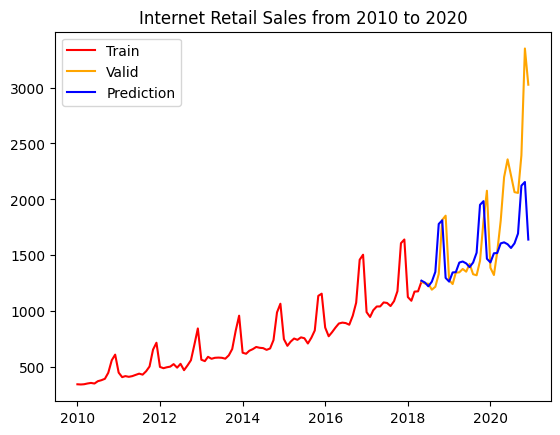

In [29]:
# Plot the predictions for training set, validation set and forecast values
plt.plot(df.loc[:100, 'Date'], df.loc[:100, 'Internet Retail Sales'], label='Train', color='red')
plt.plot(df.loc[100:, 'Date'], df.loc[100:, 'Internet Retail Sales'], label='Valid', color='orange')
plt.plot(df.loc[100:, 'Date'],forecast, label='Prediction', color='blue')
plt.title('Internet Retail Sales from 2010 to 2020')
plt.legend()
plt.show()

Based on the plot above, it seems like we correctly captured the seasonal pattern, yet it still deviates from the real values. The reason is probably because of **the outbreak of COVID in December 2019** and it directly stimulate the growth of Internet Retail Sales as everyone was required to stay home. 

This also indirectly reflected that models easily got "stale" over a longer period of time, especially when there was a "black swan" or economic crisis in the financial industry. This suggested that data scientists must regularly update the model to best capture recent trend in the financial instruments. Moreover, data scientists must also acquire specific domain knowledge to be able to judge if the model results are reasonable. 